In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [21]:
# Create visuals folder if it doesn't exist
os.makedirs("../visuals", exist_ok=True)

# Load dataset
df = pd.read_csv("../data/clean_jobs_skills.csv")


In [22]:
# Clean salary
def clean_salary(s):
    if pd.isna(s):
        return None
    s = re.sub(r'[\$,£, ]', '', str(s))  # remove $ / £ / commas / spaces
    match = re.search(r'\d+', s)
    if match:
        return float(match.group())
    return None

df['salary_clean'] = df['salary'].apply(clean_salary)

In [23]:
# Keep only rows with numeric salary
df_salary_clean = df[df['salary_clean'].notnull()].copy()

# Recalculate skill count from skills_found just in case
df_salary_clean['skill_count'] = df_salary_clean['skills_found'].apply(
    lambda x: len([s.strip() for s in str(x).split(',') if s.strip()])
)

In [24]:
# Group by skill_count and calculate average salary
salary_by_skills = df_salary_clean.groupby('skill_count')['salary_clean'].mean().reset_index()
salary_by_skills = salary_by_skills.sort_values('skill_count')

C:\Users\divij\AppData\Local\Temp\ipykernel_12364\3657368816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='salary_clean', data=salary_by_skills, palette='viridis')


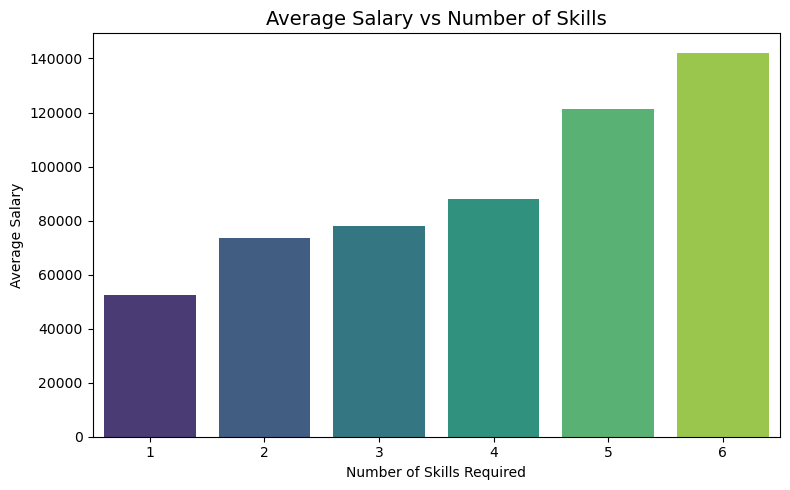

In [25]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='skill_count', y='salary_clean', data=salary_by_skills, palette='viridis')
plt.title("Average Salary vs Number of Skills", fontsize=14)
plt.xlabel("Number of Skills Required")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.savefig("../visuals/salary_vs_skills.png")
plt.show()